# Introduction to Statistics in R
Run the hidden code cell below to import the data used in this course.

In [15]:
# Load the Tidyverse
library(tidyverse)

# Read in the gapminder file
amir_deals <- read.csv("datasets/amir_deals.csv")
world_happiness <- read.csv("datasets/world_happiness.csv")
food <- read.csv("datasets/food_consumption.csv")

## Calculating Probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by
 
P(event)= # ways event can happen/total # of possible outcomes

In [2]:
# Calculate probability of picking a deal with each product
amir_deals %>%
  count(product) %>%
  mutate(prob = n/sum(n))

product,n,prob
<chr>,<int>,<dbl>
Product A,23,0.12921348
Product B,62,0.34831461
Product C,15,0.08426966
Product D,40,0.22471910
Product E,5,0.02808989
Product F,11,0.06179775
Product G,2,0.01123596
Product H,8,0.04494382
Product I,7,0.03932584


## Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [3]:
# Set random seed to 31
set.seed(31)

# Sample 5 deals without replacement
amir_deals %>%
  sample_n(5)

# Sample 5 deals with replacement
amir_deals %>%
  sample_n(5, replace = TRUE)

X,product,client,status,amount,num_users
<int>,<chr>,<chr>,<chr>,<dbl>,<int>
173,Product D,Current,Lost,3086.88,55
49,Product C,Current,Lost,3727.66,19
75,Product D,Current,Lost,4274.80,9
168,Product B,Current,Won,4965.08,9
43,Product A,Current,Won,5827.35,50


X,product,client,status,amount,num_users
<int>,<chr>,<chr>,<chr>,<dbl>,<int>
55,Product A,Current,Won,6010.04,24
27,Product B,Current,Lost,5701.70,53
62,Product D,Current,Won,6733.62,27
9,Product F,Current,Won,6780.85,80
139,Product C,Current,Won,-539.23,11


## Creating a probability distribution

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups data frame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

group_id,group_size
<chr>,<dbl>
A,2
B,4
C,6
D,2
E,2
F,2
G,3
H,2
I,4


group_size,n,probability
<dbl>,<int>,<dbl>
2,6,0.6
3,1,0.1
4,2,0.2
6,1,0.1


[1] 2.9

prob_4_or_more
<dbl>
0.3


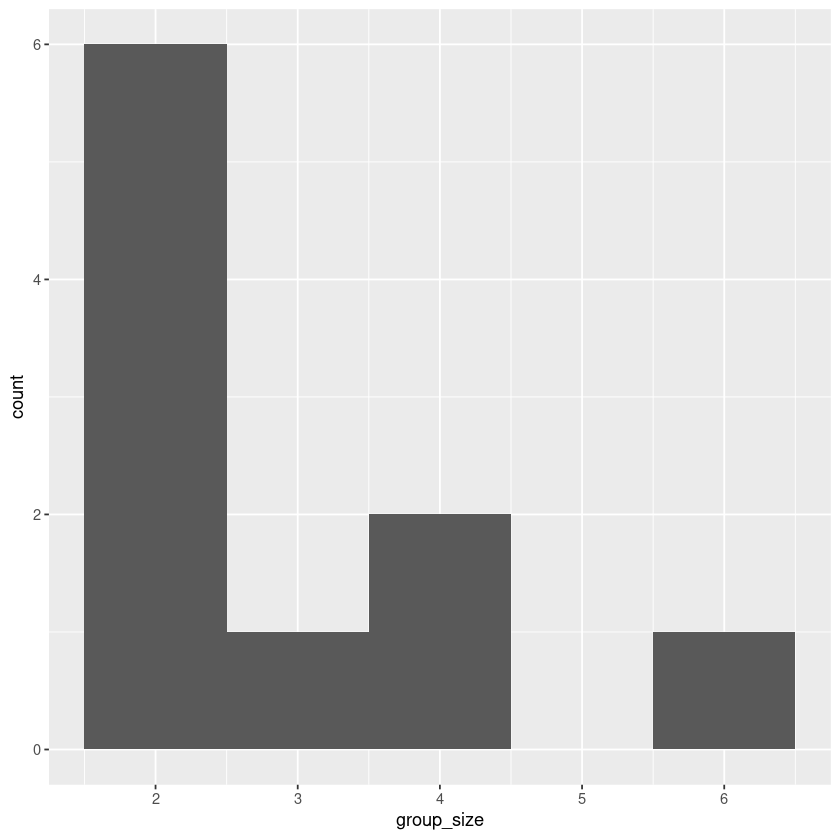

In [4]:


group_id <- c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J") #1st column
group_size <- c(2,4,6,2,2,2,3,2,4,2) #2nd column
restaurant_groups <- data.frame(group_id, group_size) #create dataframe
restaurant_groups

# Create a histogram of group_size
ggplot(restaurant_groups, aes(group_size)) +
  geom_histogram(bins = 5)

# Create probability distribution
size_distribution <- restaurant_groups %>%
  count(group_size) %>%
  mutate(probability = n / sum(n))
size_distribution
# Calculate expected group size
expected_val <- sum(size_distribution$group_size *
                    size_distribution$probability)
expected_val

# Calculate probability of picking group of 4 or more
size_distribution %>%
  # Filter for groups of 4 or larger
  filter(group_size>=4) %>%
  # Calculate prob_4_or_more by taking sum of probabilities
  summarize(prob_4_or_more = sum(probability))

## Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Assume a continuous uniform distribution.

[1] 0.1666667

[1] 0.8333333

[1] 0.3333333

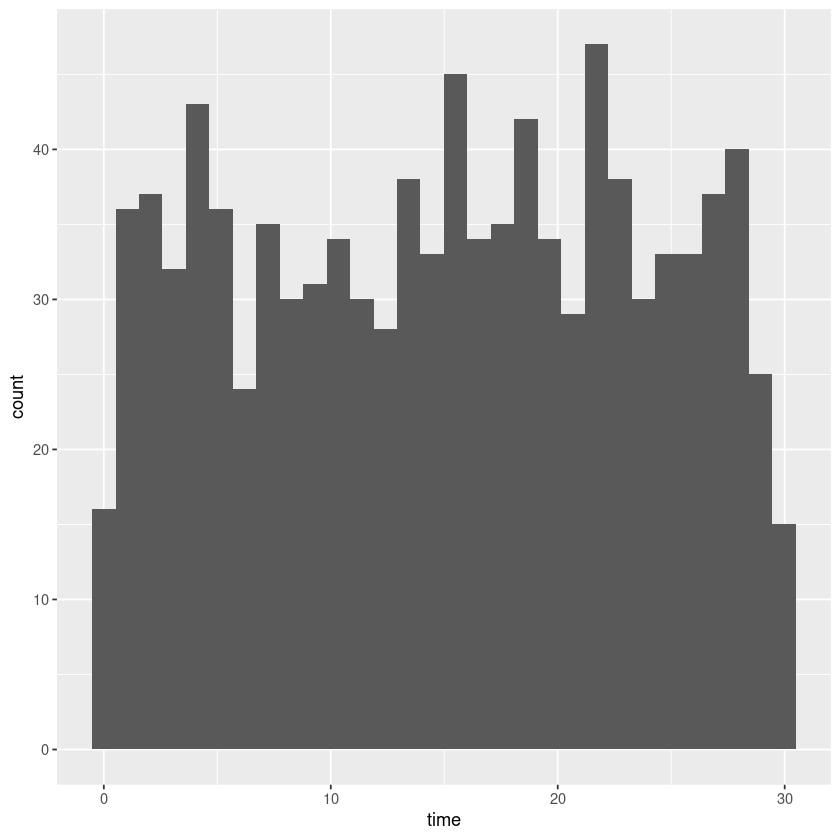

In [5]:
# Min and max wait times for back-up that happens every 30 min
min <- 0
max <- 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 <- punif(5, min = min, max = max)
prob_less_than_5

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 <- punif(5, min = min, max = max, lower.tail = FALSE)
prob_greater_than_5

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 <- punif(20, min = min, max = max) - punif(10, min = min, max = max)
prob_between_10_and_20

wait_times <- tibble(simulation_nb = 1:1000)
# Set random seed to 334
set.seed(334)

# Generate 1000 wait times between 0 and 30 mins, save in time column
wait_times %>%
  mutate(time = runif(1000, min = 0, max = 30)) %>%
  # Create a histogram of simulated times
  ggplot(aes(time)) +
  geom_histogram(bins = 30)


## Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [6]:
# Set random seed to 10
set.seed(10)

# Simulate a single deal
rbinom(1,1,.3)

# Simulate 1 week of 3 deals
#The first argument to rbinom() should be 1 since you want to simulate one week of deals
rbinom(1, 3, .3)

# Simulate 52 weeks of 3 deals
deals <- rbinom(52, 3, 0.3)

# Calculate mean deals won per week
mean(deals)

# Probability of closing 3 out of 3 deals
dbinom(3, 3, 0.3)

# Probability of closing <= 1 deal out of 3 deals
pbinom(1, 3, 0.3)

# Probability of closing > 1 deal out of 3 deals
pbinom(1, 3, 0.3, lower.tail = FALSE)

[1] 0

[1] 0

[1] 0.8076923

[1] 0.027

[1] 0.784

[1] 0.216

## How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by n * p

In [7]:
# Expected number won with 30% win rate
won_30pct <- 3 * .3
won_30pct

# Expected number won with 25% win rate
won_25pct <- 3 * .25
won_25pct

# Expected number won with 35% win rate
won_35pct <- 3 * .35
won_35pct

[1] 0.9

[1] 0.75

[1] 1.05

## Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

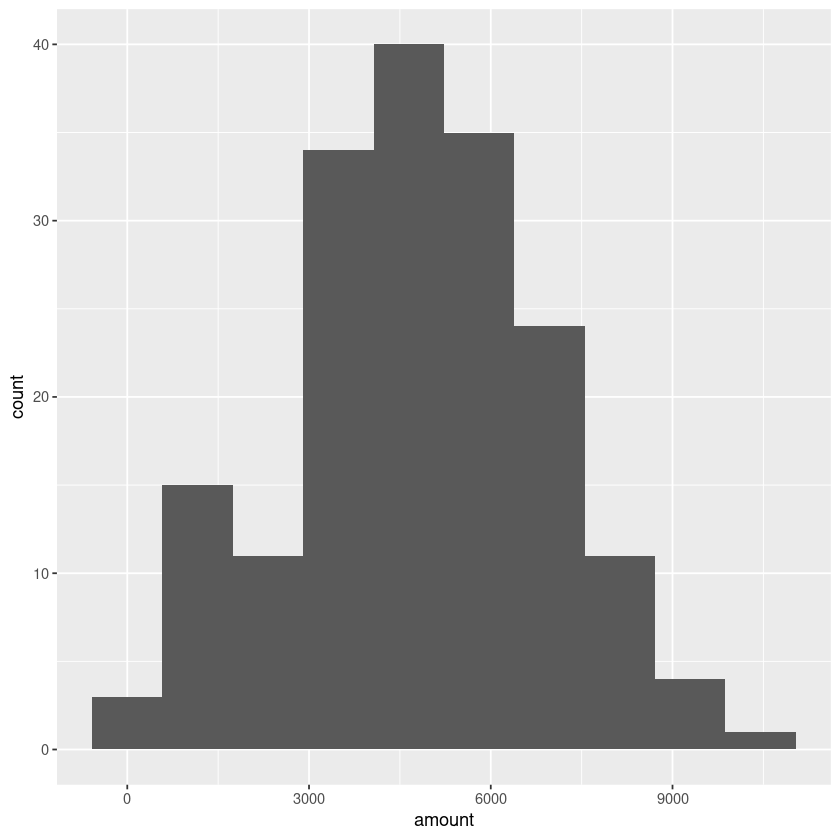

In [8]:
# Histogram of amount with 10 bins
ggplot(amir_deals, aes(amount)) + geom_histogram(bins = 10)



## Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [9]:
# Probability of deal < 7500
pnorm(7500, mean = 5000, sd = 2000)

# Probability of deal > 1000
pnorm(1000, mean = 5000, sd = 2000, lower.tail = FALSE)

# Probability of deal between 3000 and 7000
pnorm(7000, mean = 5000, sd = 2000) - pnorm(3000, mean = 5000, sd = 2000)

# Calculate amount that 75% of deals will be more than
qnorm(.75, mean = 5000, sd = 2000, lower.tail = FALSE)

[1] 0.8943502

[1] 0.9772499

[1] 0.6826895

[1] 3651.02

## Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales data frame.

[1] 0.9772499

[1] 0.9727648

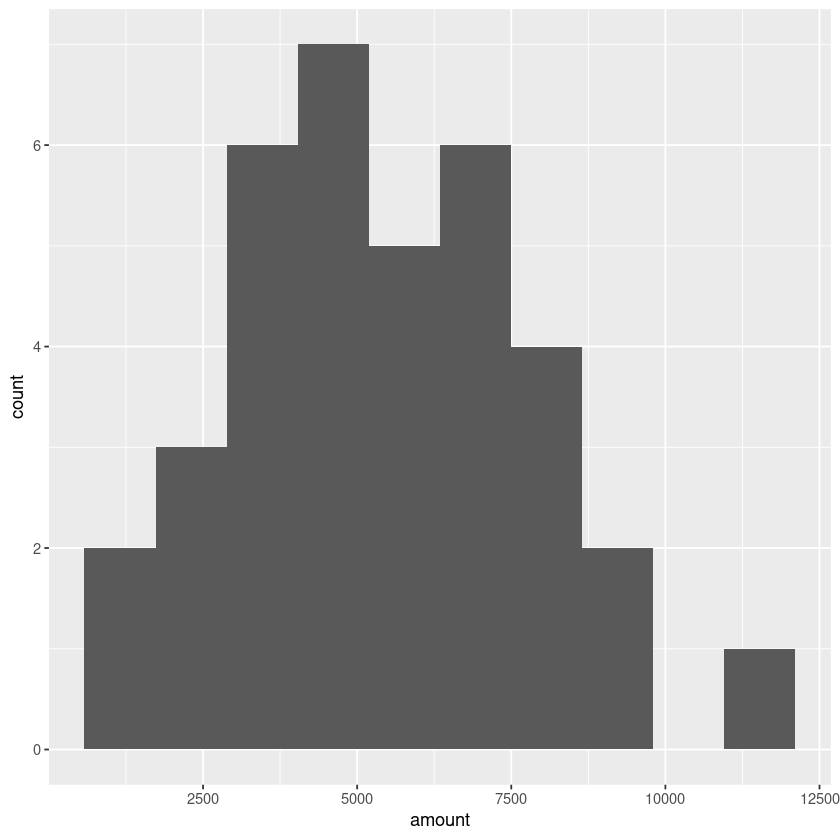

In [10]:
new_sales <- tibble(sale_num = 1:36)

# Calculate new average amount
new_mean <- 5000*1.2

# Calculate new standard deviation
new_sd <- 2000*1.3

# Simulate 36 sales
new_sales <- new_sales %>% 
  mutate(amount = rnorm(36, mean = new_mean, sd = new_sd))

# Create histogram with 10 bins
ggplot(new_sales, aes(amount)) + geom_histogram(bins = 10)

# Probability of deal > 1000
pnorm(1000, mean = 5000, sd = 2000, lower.tail = FALSE)
# Probability of deal > 1000
pnorm(1000, mean = 6000, sd = 2600, lower.tail = FALSE)

## The CLT in action

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

[1] 30.35

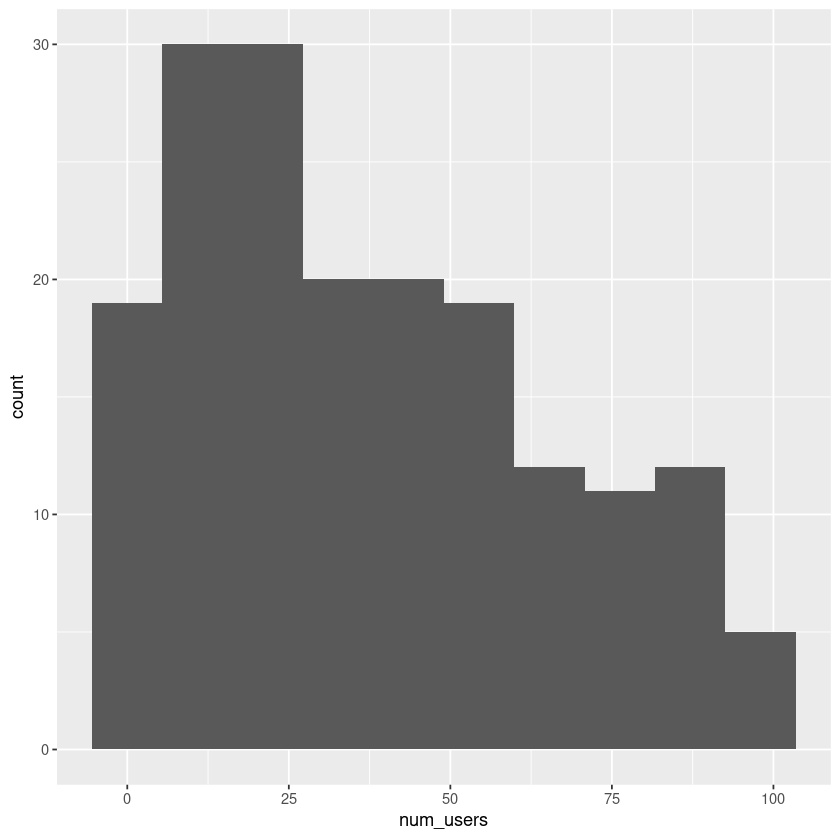

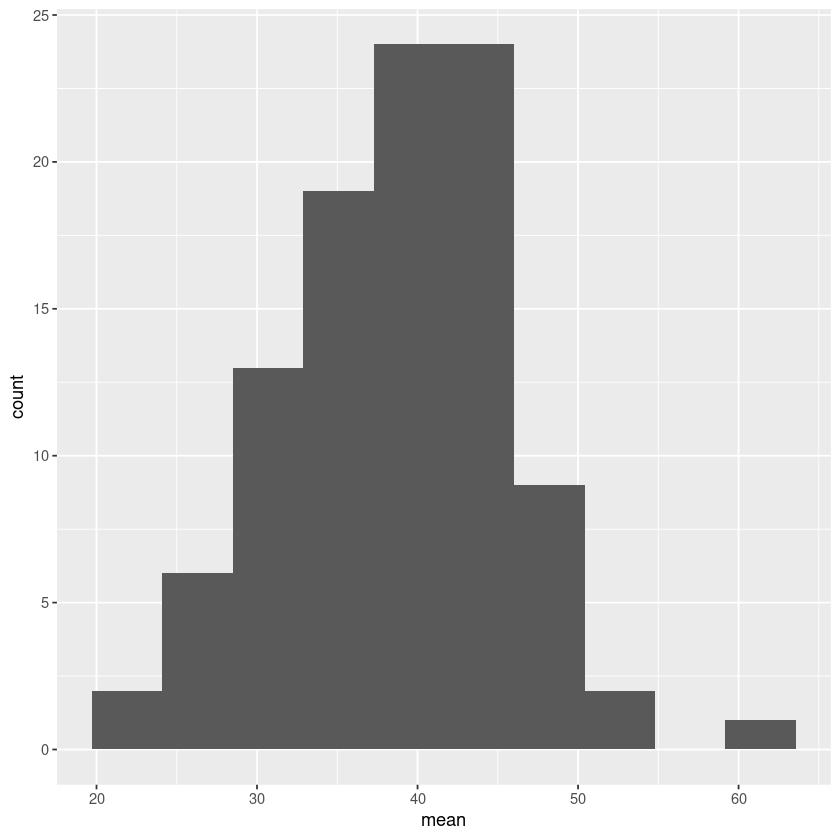

In [11]:
# Create a histogram of num_users
ggplot(amir_deals, aes(num_users)) + geom_histogram(bins = 10)

# Set seed to 104
set.seed(104)

# Sample 20 num_users from amir_deals and take mean
sample(amir_deals$num_users, size = 20, replace = TRUE) %>%
  mean()

# Repeat the above 100 times
sample_means <- replicate(100, sample(amir_deals$num_users, size = 20, replace = TRUE) %>% mean())

# Create data frame for plotting
samples <- data.frame(mean = sample_means)

# Histogram of sample means
ggplot(samples, aes(mean)) +
  geom_histogram(bins = 10)

## Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [12]:
# Probability of 5 responses
dpois(5, lambda = 4)

# Probability of 5 responses from coworker
dpois(5, lambda = 5.5)

# Probability of 2 or fewer responses
ppois(2, lambda = 4)

# Probability of > 10 responses
ppois(10, lambda = 4, lower.tail = FALSE)

[1] 0.1562935

[1] 0.1714007

[1] 0.2381033

[1] 0.002839766

## Modeling time between leads

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [13]:
# Probability response takes < 1 hour
pexp(1, rate = 1/2.5)

# Probability response takes > 4 hours
pexp(4, rate = 1/2.5, lower.tail = FALSE)

# Probability response takes 3-4 hours
pexp(4, rate = 1/2.5) - pexp(3, rate = 1/2.5)

[1] 0.32968

[1] 0.2018965

[1] 0.09929769

## Relationships between variables

In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively. 

`geom_smooth()` using formula = 'y ~ x'


[1] 0.7802249

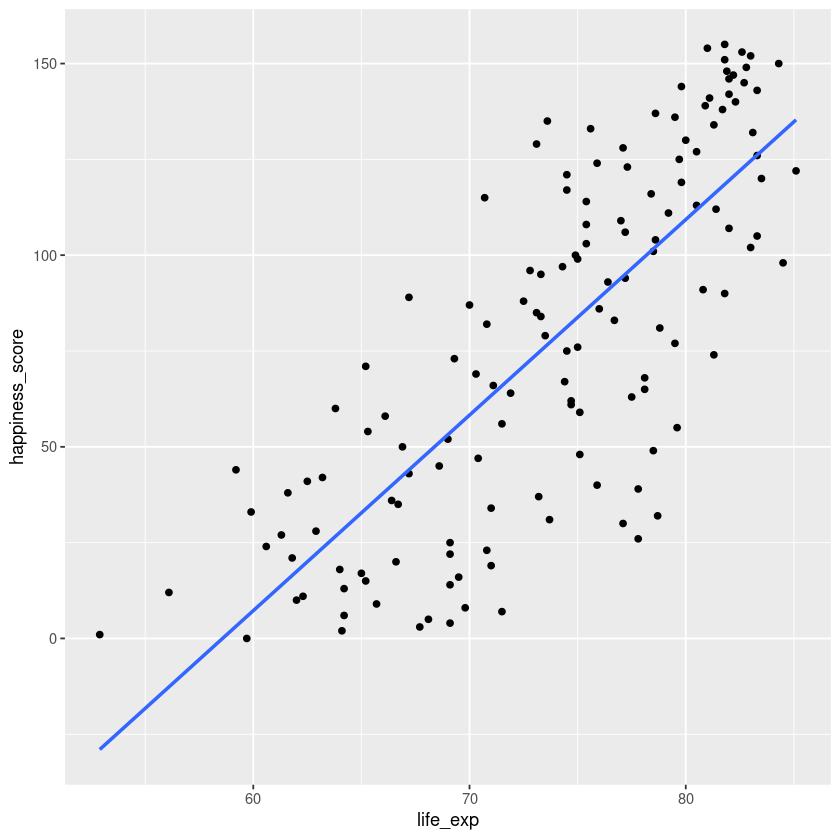

In [18]:
# Create a scatterplot of happiness_score vs. life_exp
ggplot(world_happiness,aes (x = life_exp, y = happiness_score)) + geom_point() + geom_smooth(method = 'lm', se = FALSE)

# Correlation between life_exp and happiness_score
cor(world_happiness$life_exp, world_happiness$happiness_score)

## Transforming variables

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

[1] 0.7279733

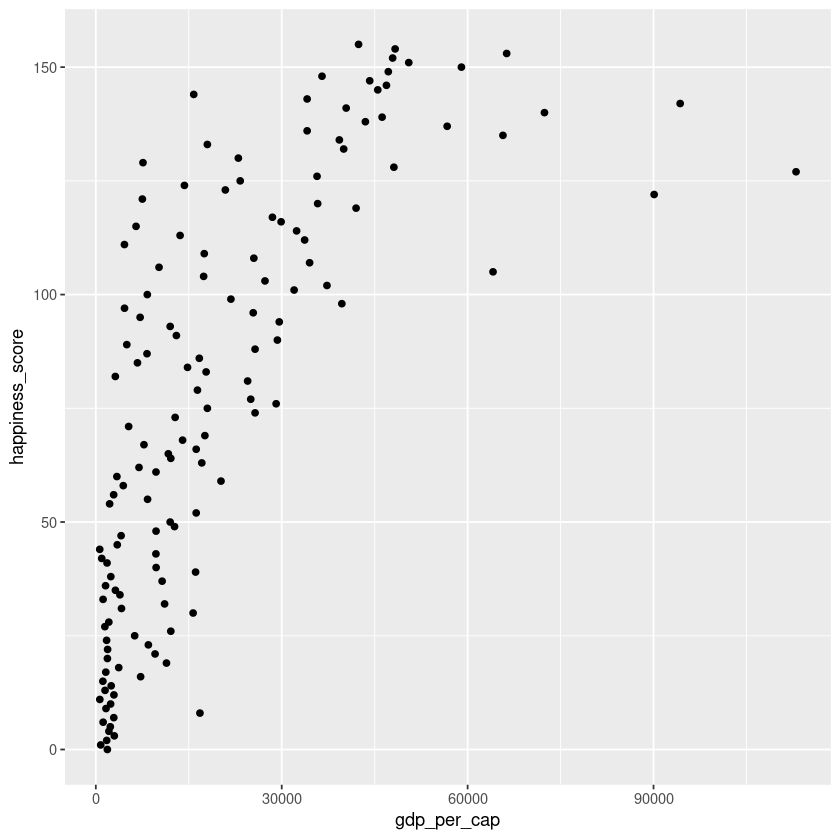

[1] 0.8043146

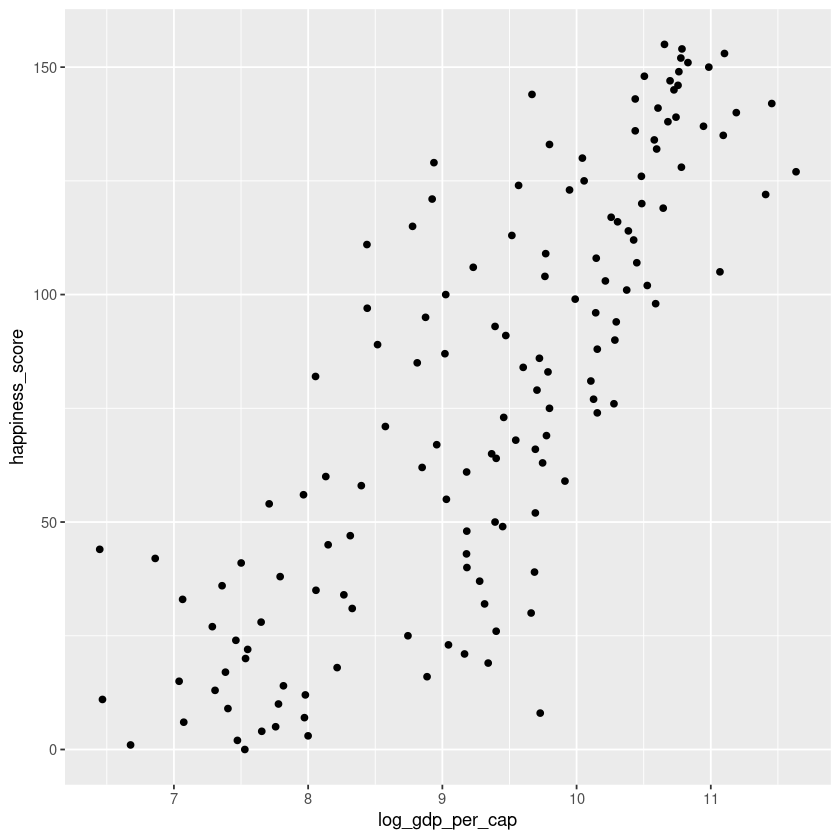

In [21]:
# Scatterplot of happiness_score vs. log_gdp_per_cap
ggplot(world_happiness, aes(x = gdp_per_cap, y = happiness_score)) +
  geom_point()

# Calculate correlation
cor(world_happiness$gdp_per_cap, world_happiness$happiness_score)

# Create log_gdp_per_cap column
world_happiness <- world_happiness %>%
  mutate(log_gdp_per_cap = log(gdp_per_cap))

# Scatterplot of happiness_score vs. log_gdp_per_cap
ggplot(world_happiness, aes(x = log_gdp_per_cap, y = happiness_score)) +
  geom_point()

# Calculate correlation
cor(world_happiness$log_gdp_per_cap, world_happiness$happiness_score)

## Does sugar improve happiness?

A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

In [ ]:
# Scatterplot of grams_sugar_per_day and happiness_score
ggplot(world_happiness, aes(x = grams_sugar_per_day, y = happiness_score)) + geom_point()

# Correlation between grams_sugar_per_day and happiness_score
cor(world_happiness$grams_sugar_per_day, world_happiness$happiness_score)